In [1]:
!gdown https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights  ## yolov4 weights

Downloading...
From: https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights
To: /content/yolov4.weights
100% 258M/258M [00:05<00:00, 49.9MB/s]


In [2]:
!gdown https://raw.githubusercontent.com/Tianxiaomo/pytorch-YOLOv4/master/cfg/yolov4.cfg ##yolov4 cfg

Downloading...
From: https://raw.githubusercontent.com/Tianxiaomo/pytorch-YOLOv4/master/cfg/yolov4.cfg
To: /content/yolov4.cfg
12.2kB [00:00, 35.5MB/s]     


In [3]:
!gdown https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names ##coco names

Downloading...
From: https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
To: /content/coco.names
625B [00:00, 2.18MB/s]       


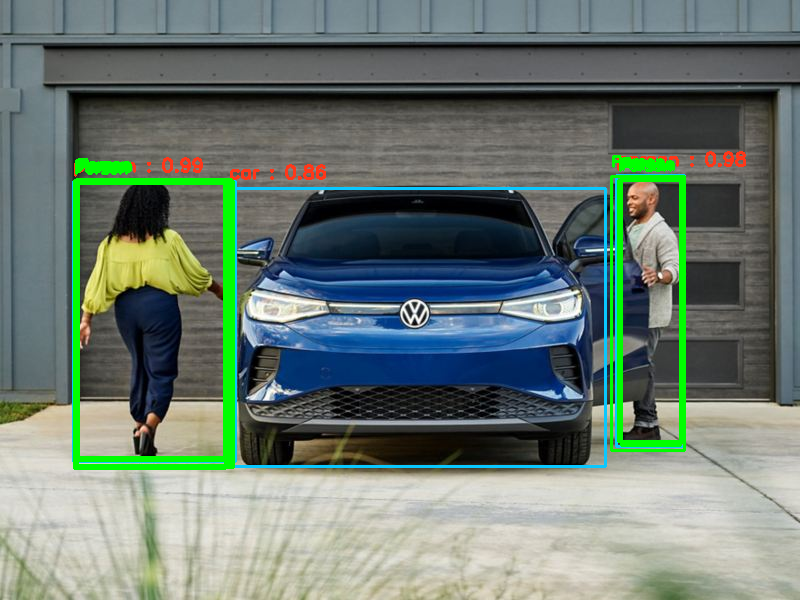

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load YOLO model
net = cv2.dnn.readNet("/content/drive/MyDrive/AI-industry-4.0/yolov4.weights", "/content/drive/MyDrive/AI-industry-4.0/yolov4.cfg")

# Load COCO class names
classes = []
with open("/content/drive/MyDrive/AI-industry-4.0/coco.names", "r") as f:
    classes = f.read().strip().split("\n")

# Filter classes to only keep "person"
person_class_id = classes.index("person")

# Set up model for only person detection
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# Load image
image = cv2.imread("/content/drive/MyDrive/AI-industry-4.0/download.png")
height, width, _ = image.shape

# Prepare image for YOLO
blob = cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False)
net.setInput(blob)

# Forward pass through the network
outs = net.forward(net.getUnconnectedOutLayersNames())

# Process the detections
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if class_id == person_class_id and confidence > 0.5:
            # Get bounding box coordinates
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            bbox_width = int(detection[2] * width)
            bbox_height = int(detection[3] * height)
            x = int(center_x - (bbox_width / 2))
            y = int(center_y - (bbox_height / 2))

            # Draw bounding box and label
            cv2.rectangle(image, (x, y), (x + bbox_width, y + bbox_height), (0, 255, 0), 2)
            cv2.putText(image, "Person", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display and save the result
cv2_imshow(image)
cv2.imwrite("/content/drive/MyDrive/AI-industry-4.0/result.jpg", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
